<a href="https://colab.research.google.com/github/akashmat/segment3d-waymo/blob/main/Waymo_3D_Seg_WB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data Access
1. Create Folder data/{waymo-perception} to store Waymo Dataset.
2. Connect Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#%cd ./drive/MyDrive/data/waymo-perception/

Mounted at /content/drive


#### Download Waymo Dataset from Google Cloud Buckets

In [ ]:
#Follow the prompt to connect to google cloud.
!gcloud auth login

In [ ]:
# The first command will take many hours(upwards of 4) to download.
#!gsutil -m cp -r "gs://waymo_open_dataset_v_2_0_1/training" .
"""!gsutil -m cp -r \
  "gs://waymo_open_dataset_v_2_0_1/testing" \
  "gs://waymo_open_dataset_v_2_0_1/testing_location" \
  "gs://waymo_open_dataset_v_2_0_1/validation" \
  ."""

#### Packages

In [ ]:
#%cd /content
!rm -rf waymo-od > /dev/null
!git clone https://github.com/waymo-research/waymo-open-dataset.git waymo-od
!cd waymo-od && git branch -a
!cd waymo-od && git checkout remotes/origin/r1.0
!pip3 install --upgrade pip

#### Initial Setup

In [ ]:
!pip3 install waymo-open-dataset-tf-2-12-0==1.6.4

In [1]:
from typing import Optional
import tensorflow as tf
import dask.dataframe as dd
from waymo_open_dataset import v2

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

#### Basic Function to read from path
The dataset is organized into multiple tables with multi-column keys, creating a relational database-like structure on top of Apache Parquet files. This structure combines the benefits of Apache Parquet's efficient storage and retrieval of large amounts of data with the ease of use of relational databases: filtering, grouping, and aggregating, and the use of multi-column keys enhances joins.

In [2]:
# Path to the directory with all components
dataset_dir = 'drive/MyDrive/data/waymo-perception/training'
context_name = '10023947602400723454_1120_000_1140_000'

def read(tag: str) -> dd.DataFrame:
  """Creates a Dask DataFrame for the component specified by its tag."""
  paths = tf.io.gfile.glob(f'{dataset_dir}/{tag}/{context_name}.parquet')
  return dd.read_parquet(paths)

In [3]:
table_path = f'{dataset_dir}/camera_image/{context_name}.parquet'
print(f'Reading a single shard from a single component {table_path}')
table = dd.read_parquet(table_path)
table.head()

Reading a single shard from a single component drive/MyDrive/data/waymo-perception/training/camera_image/10023947602400723454_1120_000_1140_000.parquet


,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,[CameraImageComponent].image,[CameraImageComponent].pose.transform,[CameraImageComponent].velocity.linear_velocity.x,[CameraImageComponent].velocity.linear_velocity.y,[CameraImageComponent].velocity.linear_velocity.z,[CameraImageComponent].velocity.angular_velocity.x,[CameraImageComponent].velocity.angular_velocity.y,[CameraImageComponent].velocity.angular_velocity.z,[CameraImageComponent].pose_timestamp,[CameraImageComponent].rolling_shutter_params.shutter,[CameraImageComponent].rolling_shutter_params.camera_trigger_time,[CameraImageComponent].rolling_shutter_params.camera_readout_done_time
index,,,,,,,,,,,,,,,
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6990588408049747, 0.7150334085392328, 0.006...",1.337475,-1.359002,0.027288,-0.015392,0.012218,0.011145,1.552440e+09,0.006981,1.552440e+09,1.552440e+09
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6989900519876013, 0.7151025083199268, 0.006...",1.333927,-1.373261,0.024719,-0.016407,0.010103,0.017257,1.552440e+09,0.009992,1.552440e+09,1.552440e+09
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6987839219647801, 0.7153068814214333, 0.006...",1.339028,-1.374271,0.019406,-0.017616,0.006203,0.013990,1.552440e+09,0.009992,1.552440e+09,1.552440e+09
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6991963373797294, 0.7148964117436919, 0.006...",1.332058,-1.358936,0.031292,-0.015262,0.015056,0.013473,1.552440e+09,0.009992,1.552440e+09,1.552440e+09
10023947602400723454_1120_000_1140_000;1552440195362591,10023947602400723454_1120_000_1140_000,1552440195362591,5,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6992650451400215, 0.7148278952390329, 0.007...",1.332926,-1.353070,0.035072,-0.014256,0.017961,0.010754,1.552440e+09,0.009992,1.552440e+09,1.552440e+09


#### Components
A component in the context of the Waymo Open Dataset v2 format is a set of related fields (table columns). Key columns start with `key.` prefix and use same names across all components. Component specific columns start with `[Name of a Component].` prefix. Each column represents a simple Python type or a list of elements of a simple type.


In [ ]:
# @title List columns in all components

print('Available components:')
for component, tag in v2.TAG_BY_COMPONENT.items():
  print(f'{tag}: {component.__name__}')
  schema = component.schema()
  for column, arrow_type in zip(schema.names, schema.types):
    print(f'\t{str(arrow_type):40s} {column}')

Available components:
camera_box: CameraBoxComponent
	string                                   key.segment_context_name
	int64                                    key.frame_timestamp_micros
	int8                                     key.camera_name
	string                                   key.camera_object_id
	double                                   [CameraBoxComponent].box.center.x
	double                                   [CameraBoxComponent].box.center.y
	double                                   [CameraBoxComponent].box.size.x
	double                                   [CameraBoxComponent].box.size.y
	int8                                     [CameraBoxComponent].type
	int8                                     [CameraBoxComponent].difficulty_level.detection
	int8                                     [CameraBoxComponent].difficulty_level.tracking
camera_calibration: CameraCalibrationComponent
	string                                   key.segment_context_name
	int8                        

Same convention to name key columns for all components: can automatically determine a subset of columns to JOIN two tables by calling v2.merge function:

In [4]:
# Merge
df = v2.merge(read('camera_image'), read('camera_box'))

# Show the list of columns in the combined DataFrame
df.head()


,key.segment_context_name,key.frame_timestamp_micros,key.camera_name,[CameraImageComponent].image,[CameraImageComponent].pose.transform,[CameraImageComponent].velocity.linear_velocity.x,[CameraImageComponent].velocity.linear_velocity.y,[CameraImageComponent].velocity.linear_velocity.z,[CameraImageComponent].velocity.angular_velocity.x,[CameraImageComponent].velocity.angular_velocity.y,...,[CameraImageComponent].rolling_shutter_params.camera_trigger_time,[CameraImageComponent].rolling_shutter_params.camera_readout_done_time,key.camera_object_id,[CameraBoxComponent].box.center.x,[CameraBoxComponent].box.center.y,[CameraBoxComponent].box.size.x,[CameraBoxComponent].box.size.y,[CameraBoxComponent].type,[CameraBoxComponent].difficulty_level.detection,[CameraBoxComponent].difficulty_level.tracking
0,10023947602400723454_1120_000_1140_000,1552440195362591,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6990588408049747, 0.7150334085392328, 0.006...",1.337475,-1.359002,0.027288,-0.015392,0.012218,...,1.552440e+09,1.552440e+09,02f3a769-021f-49b0-b954-18e4fa1d5fde,900.01575,665.69586,13.89498,22.73724,1,2.0,2.0
1,10023947602400723454_1120_000_1140_000,1552440195362591,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6990588408049747, 0.7150334085392328, 0.006...",1.337475,-1.359002,0.027288,-0.015392,0.012218,...,1.552440e+09,1.552440e+09,0611ea50-f652-406d-942a-9ec7e3e90546,1303.60176,697.90695,29.05314,54.94833,2,NaN,NaN
2,10023947602400723454_1120_000_1140_000,1552440195362591,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6990588408049747, 0.7150334085392328, 0.006...",1.337475,-1.359002,0.027288,-0.015392,0.012218,...,1.552440e+09,1.552440e+09,08b1e19e-b912-4963-a7bb-55e138bbc25e,1828.45305,741.48666,67.58013,99.15963,2,NaN,NaN
3,10023947602400723454_1120_000_1140_000,1552440195362591,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6990588408049747, 0.7150334085392328, 0.006...",1.337475,-1.359002,0.027288,-0.015392,0.012218,...,1.552440e+09,1.552440e+09,11165fc3-e936-4722-9257-1574c6752eab,951.17454,658.74837,13.89498,15.78975,1,2.0,2.0
4,10023947602400723454_1120_000_1140_000,1552440195362591,1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"[0.6990588408049747, 0.7150334085392328, 0.006...",1.337475,-1.359002,0.027288,-0.015392,0.012218,...,1.552440e+09,1.552440e+09,24508c28-3154-4b7f-964d-70b3ed7d5a9d,608.85276,715.59147,67.58013,99.15963,2,NaN,NaN


In [5]:
camera_image_df = read('camera_image')
# Filter the images from camera=1
# NOTE: We could also use push down filters while reading the parquet files as well
camera_image_df = camera_image_df[camera_image_df['key.camera_name'] == 1]

camera_box_df = read('camera_box')
# Inner join the camera_image table with the camera_box table.
df = camera_image_df.merge(
    camera_box_df,
    on=[
        'key.segment_context_name',
        'key.frame_timestamp_micros',
        'key.camera_name',
    ],
    how='inner',
)

# Create corresponding components from the raw
_, row = next(iter(df.iterrows()))

camera_image = v2.CameraImageComponent.from_dict(row)
camera_box = v2.CameraBoxComponent.from_dict(row)
print(
    f'Loaded image ({len(camera_image.image)} bytes) for'
    f' {camera_image.key.camera_name=} {camera_image.key.frame_timestamp_micros} {camera_image.key.camera_name=}'
)
print(
    'Loaded bounding box for'
    f' {camera_box.key.camera_object_id=} {camera_box.box=}'
)

Loaded image (387998 bytes) for camera_image.key.camera_name=1 1552440195362591 camera_image.key.camera_name=1
Loaded bounding box for camera_box.key.camera_object_id='02f3a769-021f-49b0-b954-18e4fa1d5fde' camera_box.box=BoxAxisAligned2d(center=Vec2d(x=900.01575, y=665.69586), size=Vec2d(x=13.894980000000032, y=22.737240000000043))


#### WODv2 API

Can access the dataset using external libraries, but also with the WODv2 python library which defines an object-oriented API.

In [ ]:
# Read a single row from the table
_, row = next(iter(table.iterrows()))


# Direct access to the tabular data
def process_coordinates(x: float, y: float, z: float) -> None:
  print(f'{x=} {y=} {z=}')

# Use DataFrame row directly
process_coordinates(
    row['[CameraImageComponent].velocity.linear_velocity.x'],
    row['[CameraImageComponent].velocity.linear_velocity.y'],
    row['[CameraImageComponent].velocity.linear_velocity.z'],)


# Access via the object-oriented API
def process_point(p: v2.Vec3d) -> None:
  print(f'{p.x=} {p.y=} {p.z=}')

image = v2.CameraImageComponent.from_dict(row)
process_point(image.velocity.linear_velocity)

x=1.3374745845794678 y=-1.359001636505127 z=0.02728821150958538
p.x=1.3374745845794678 p.y=-1.359001636505127 p.z=0.02728821150958538


In [ ]:
# Lazy read camera images and boxes
cam_image_df = read('camera_image')
cam_box_df = read('camera_box')

# Combine DataFrame for individual components into a single DataFrame.

# After merging each row will have a camera image and all associated boxes.
image_w_box_df = v2.merge(cam_image_df, cam_box_df, right_group=True)

# Show raw data
#image_w_box_df.head()

# Access data fields via v2 object-oriented API
print(f'Available {image_w_box_df.shape[0].compute()} rows:')
for i, (_, r) in enumerate(image_w_box_df.iterrows()):
  # Create component dataclasses for the raw data
  cam_image = v2.CameraImageComponent.from_dict(r)
  cam_box = v2.CameraBoxComponent.from_dict(r)
  print(
      f'context_name: {cam_image.key.segment_context_name}\n'
      f' ts: {cam_image.key.frame_timestamp_micros}\n'
      f' camera_name: {cam_image.key.camera_name}\n'
      f' image size: {len(cam_image.image)\n} bytes.'
      f' Has {len(cam_box.key.camera_object_id)} camera labels:')

  for j, (object_id, x, y) in enumerate(zip(cam_box.key.camera_object_id,
                                            cam_box.box.center.x,
                                            cam_box.box.center.y)):
    print(f'\tid: {object_id},  center: ({x:.1f}, {y:.1f}) px')
    if j > 2:
      print('\t...')
      break

  if i > 2:
    print('...')
    break

Available 979 rows:
context_name: 10023947602400723454_1120_000_1140_000 ts: 1552440195362591 camera_name: 1 image size: 387998 bytes. Has 50 camera labels:
	id: 02f3a769-021f-49b0-b954-18e4fa1d5fde,  center: (900.0, 665.7) px
	id: 0611ea50-f652-406d-942a-9ec7e3e90546,  center: (1303.6, 697.9) px
	id: 08b1e19e-b912-4963-a7bb-55e138bbc25e,  center: (1828.5, 741.5) px
	id: 11165fc3-e936-4722-9257-1574c6752eab,  center: (951.2, 658.7) px
	...
context_name: 10023947602400723454_1120_000_1140_000 ts: 1552440195362591 camera_name: 2 image size: 412300 bytes. Has 11 camera labels:
	id: 0ec04ccf-c924-45b1-ab54-cbc82a742877,  center: (703.9, 1108.3) px
	id: 144c7855-9e09-4bda-bb7a-c52a06d3075f,  center: (953.7, 628.4) px
	id: 17742b3c-df43-42a6-ba81-c67474d0990b,  center: (1052.9, 665.7) px
	id: 648739d1-b4d9-467a-8274-a68cbe294d48,  center: (1479.0, 1052.6) px
	...
context_name: 10023947602400723454_1120_000_1140_000 ts: 1552440195362591 camera_name: 4 image size: 193053 bytes. Has 1 camera la


#### Joining components for different applications

Prepare input data for preprocessing pipelines operating at different levels: entire run segment, scene, frame, camera or a crop for a specific object.

NOTE: Depending on the level or type of the JOIN operation used to define a table, a single row of the table may contain repeated values for some parts of the data, referring the same original record (ex. repeated camera images or lidar data for each object).

#### Scene or track level
At this level each row of a table represents data for a single object across all frames in a scene.


In [ ]:
# Lazily read lidar boxes
lidar_box_df = read('lidar_box')

# Group all available boxes per object
lidar_box_df = (
    lidar_box_df.groupby(['key.segment_context_name', 'key.laser_object_id'])
    .agg(list)
    .reset_index()
)

# Read a single row, which contains data for all available frames.
_, row = next(iter(lidar_box_df.iterrows()))

# Create component object
lidar_box = v2.LiDARBoxComponent.from_dict(row)
print(
    f'Object {lidar_box.key.laser_object_id=} seen on'
    f' {len(lidar_box.key.frame_timestamp_micros)} frames'
)
print('Its trajectory across frames:')
print(f'\t{lidar_box.box.center.x=}')
print(f'\t{lidar_box.box.center.y=}')
print(f'\t{lidar_box.box.center.z=}')

Object lidar_box.key.laser_object_id='-U88NMYnocLWCh6iqZwj1g' seen on 199 frames
Its trajectory across frames:
	lidar_box.box.center.x=[-20.863535288122875, -21.050722508383842, -21.237351298976137, -21.422635634626204, -21.608047150783023, -21.790713146960115, -21.96907248003845, -22.140054227314977, -22.308506746981948, -22.4775479670825, -22.646536208610996, -22.81071514024552, -22.973921739125217, -23.139718013004313, -23.30734204410328, -23.473067963248468, -23.638405607989625, -23.806088110046403, -23.97473881152473, -24.143431923685057, -24.310974197978794, -24.481291095969937, -24.655055812612773, -24.829362960557773, -25.005995823323246, -25.186752135785355, -25.36870068398821, -25.54963339848473, -25.72863894546208, -25.906232245248248, -26.083227791634272, -26.254128003001824, -26.418848005305335, -26.577672974195593, -26.731899369389794, -26.880456459917696, -27.021892736484006, -27.155380667296413, -27.28366575403379, -27.40465530205438, -27.517577111255378, -27.6240724536

#### Frame level

At this level each row of a table represents a single frame with all objects in it.


In [ ]:
#@title Sensor data with both lidar and camera boxes

# Lazily read DataFrames for all components.
association_df = read('camera_to_lidar_box_association')
cam_box_df = read('camera_box')
cam_img_df = read('camera_image')
lidar_box_df = read('lidar_box')
lidar_df = read('lidar')

# Join all DataFrames using matching columns
cam_image_w_box_df = v2.merge(cam_box_df, cam_img_df)
cam_obj_df = v2.merge(association_df, cam_image_w_box_df)
obj_df = v2.merge(cam_obj_df, lidar_box_df)
# Group lidar sensors (left), group labels and camera images (right) and join.
df = v2.merge(lidar_df, obj_df, left_group=True, right_group=True)

# Read a single row, which contain data for all data for a single frame.
_, row = next(iter(df.iterrows()))
# Create all component objects
camera_image = v2.CameraImageComponent.from_dict(row)
lidar = v2.LiDARComponent.from_dict(row)
camera_box = v2.CameraBoxComponent.from_dict(row)
lidar_box = v2.LiDARBoxComponent.from_dict(row)

print(
    f'Found {len(lidar_box.key.laser_object_id)} objects on'
    f' {lidar.key.segment_context_name=} {lidar.key.frame_timestamp_micros=}'
)
for laser_object_id, camera_object_id, camera_name in zip(
    lidar_box.key.laser_object_id,
    camera_box.key.camera_object_id,
    camera_image.key.camera_name,
):
  print(f'\t{laser_object_id=} {camera_object_id=} {camera_name=}')

Found 24 objects on lidar.key.segment_context_name='10023947602400723454_1120_000_1140_000' lidar.key.frame_timestamp_micros=1552440195362591
	laser_object_id='ZyK_iICxQsEYdJLxMFTw7w' camera_object_id='08b1e19e-b912-4963-a7bb-55e138bbc25e' camera_name=1
	laser_object_id='ZyK_iICxQsEYdJLxMFTw7w' camera_object_id='da518036-17cb-48c4-97aa-97939f989d16' camera_name=3
	laser_object_id='dNW3S4yA8s8GmltmAPV8LQ' camera_object_id='24508c28-3154-4b7f-964d-70b3ed7d5a9d' camera_name=1
	laser_object_id='8IZ7fkXm0FDeUdEuJAqSlA' camera_object_id='260f57c0-787d-4f36-bfe9-64ca9828448f' camera_name=1
	laser_object_id='brLOJzgVMhP_-kdQzIa7ng' camera_object_id='30326915-a157-4c60-9bef-0a188938c998' camera_name=1
	laser_object_id='txvVqORJ6Gcf510DdJvW4Q' camera_object_id='4286a233-4a34-4d99-b214-2d8690e92570' camera_name=1
	laser_object_id='L5HBM5tSKtNA4qHegDQk8Q' camera_object_id='4b9a9206-fbf1-4d45-8765-197759100bd6' camera_name=1
	laser_object_id='YTw2k0_-8UqolJn4WQRc2g' camera_object_id='699b6cb3-afc1-

In [ ]:
# @title Sensor data with lidar and camera boxes if available

# Lazily read DataFrames for all components.
association_df = read('camera_to_lidar_box_association')
cam_box_df = read('camera_box')
cam_img_df = read('camera_image')
lidar_box_df = read('lidar_box')
lidar_df = read('lidar')

# Join all DataFrames using matching columns
cam_image_w_box_df = v2.merge(cam_box_df, cam_img_df)
cam_obj_df = v2.merge(association_df, cam_image_w_box_df)
# In this example camera box labels are optional, so we set left_nullable=True.
obj_df = v2.merge(cam_obj_df, lidar_box_df, left_nullable=True)
# Group lidar sensors (left), group labels and camera images (right) and join.
df = v2.merge(lidar_df, obj_df, left_group=True, right_group=True)

# Read a single row, which contain data for all data for a single frame.
_, row = next(iter(df.iterrows()))
# Create all component objects
camera_image = v2.CameraImageComponent.from_dict(row)
lidar = v2.LiDARComponent.from_dict(row)
camera_box = v2.CameraBoxComponent.from_dict(row)
lidar_box = v2.LiDARBoxComponent.from_dict(row)

print(
    f'Found {len(lidar_box.key.laser_object_id)} objects on'
    f' {lidar.key.segment_context_name=} {lidar.key.frame_timestamp_micros=}'
)
for laser_object_id, camera_object_id, camera_name in zip(
    lidar_box.key.laser_object_id,
    camera_box.key.camera_object_id,
    camera_image.key.camera_name,
):
  print(f'\t{laser_object_id=} {camera_object_id=} {camera_name=}')

Found 81 objects on lidar.key.segment_context_name='10023947602400723454_1120_000_1140_000' lidar.key.frame_timestamp_micros=1552440195362591
	laser_object_id='-U88NMYnocLWCh6iqZwj1g' camera_object_id=nan camera_name=nan
	laser_object_id='0VCoeT-jjrIfzTCsOWz20A' camera_object_id=nan camera_name=nan
	laser_object_id='63vjcxiQGxy6SmQ94yX-FQ' camera_object_id=nan camera_name=nan
	laser_object_id='81faaqjwezt3wc0ZN-1N0g' camera_object_id=nan camera_name=nan
	laser_object_id='A4kzX4tBck4XcFuUOPA6Lg' camera_object_id='42d3fd29-cc31-44c6-a044-7af1a172488e' camera_name=3.0
	laser_object_id='CB379cbEIKwW6eAs4wK6mw' camera_object_id='baae00a2-cacd-43c9-9d83-0932920c987e' camera_name=1.0
	laser_object_id='Iv3M96stRJ3JE-umZR0uVA' camera_object_id=nan camera_name=nan
	laser_object_id='L5HBM5tSKtNA4qHegDQk8Q' camera_object_id='4b9a9206-fbf1-4d45-8765-197759100bd6' camera_name=1.0
	laser_object_id='PrS_b18HNPEbxJ9IAYW2BQ' camera_object_id=nan camera_name=nan
	laser_object_id='YTw2k0_-8UqolJn4WQRc2g' 

#### Object level

At this level each row of a table represents a single object at a single frame.


In [ ]:
# @title Camera image, lidar, boxes with keypoints


# Lazily read DataFrames for all components.
association_df = read('camera_to_lidar_box_association')
cam_hkp_df = read('camera_hkp')
cam_box_df = read('camera_box')
cam_img_df = read('camera_image')
lidar_box_df = read('lidar_box')
lidar_df = read('lidar')

# Join all DataFrame objects for all components together.
cam_image_w_box_df = v2.merge(cam_box_df, cam_img_df)
cam_image_w_box_w_hkp_df = v2.merge(cam_image_w_box_df, cam_hkp_df)
cam_obj_df = v2.merge(association_df, cam_image_w_box_w_hkp_df)
obj_df = v2.merge(cam_obj_df, lidar_box_df)
t = v2.merge(lidar_df, obj_df, left_group=True, right_group=True)

# Create a row iterator (continue to the next cell)
it = iter(t.iterrows())

In [ ]:
# Execute this cell multiple times to see data for different rows.

# Actually read the data.
_, row = next(it)

# Create all component objects
camera_hkp = v2.CameraHumanKeypointsComponent.from_dict(row)
camera_box = v2.CameraBoxComponent.from_dict(row)
camera_image = v2.CameraImageComponent.from_dict(row)
lidar_box = v2.LiDARBoxComponent.from_dict(row)
lidar = v2.LiDARComponent.from_dict(row)

print(
    f'Found {len(lidar_box.key.laser_object_id)} objects on'
    f' {lidar.key.segment_context_name=} {lidar.key.frame_timestamp_micros=}'
)
for laser_object_id, camera_object_id, camera_name, cam_kp_x in zip(
    lidar_box.key.laser_object_id,
    camera_box.key.camera_object_id,
    camera_image.key.camera_name,
    camera_hkp.camera_keypoints.keypoint_2d.location_px.x,
):
  print(
      f'\t{laser_object_id=} {camera_object_id=} {camera_name=} with'
      f' {len(cam_kp_x)} camera keypoints'
  )

Found 1 objects on lidar.key.segment_context_name='10023947602400723454_1120_000_1140_000' lidar.key.frame_timestamp_micros=1552440195462613
	laser_object_id='ZyK_iICxQsEYdJLxMFTw7w' camera_object_id='08b1e19e-b912-4963-a7bb-55e138bbc25e' camera_name=1 with 7 camera keypoints


#### Perception Dataset
Contains 2,030 segments of 20 seconds each, collected at 10Hz (390,000 frames) in diverse geographies and conditions.  
- Extracted perception objects from multi-sensor data: all 5 cameras and the top lidar.
- Lidar features include 3D point cloud sequences that support 3D object shape reconstruction. Also provided refined box pose through point cloud shape registration for all objects in the vehicle category.
- Camera features include sequences of camera patches from the most_visible_camera, projected lidar returns on the corresponding camera, per-pixel camera rays information, and auto-labeled 2D panoptic segmentation that supports object NeRF reconstruction, detailed in the [paper](https://waymo.com/research/gina-3d-learning-to-generate-implicit-neural-assets-in-the-wild/).
- 2M object frames from 31K unique object instances that covers 2 classes (vehicles and pedestrians).
  
Sensor data
- 1 mid-range lidar
- 4 short-range lidars
- 5 cameras (front and sides)
- Synchronized lidar and camera data
- Lidar to camera projections
- Sensor calibrations and vehicle poses
  
Bounding box labels
- Labels for 4 object classes - Vehicles, Pedestrians, Cyclists, Signs
- High-quality labels for lidar data in 1,200 segments
- 12.6M 3D bounding box labels with tracking IDs on lidar data
- High-quality labels for camera data in 1,000 segments
- 11.8M 2D bounding box labels with tracking IDs on camera data

3D semantic segmentation labels
- Segmentation labels for 1,150 segments
- Labels for 23 classes: Car, Truck, Bus, Motorcyclist, Bicyclist, Pedestrian, Sign, Traffic Light, Pole, Construction Cone, Bicycle, Motorcycle, Building, Vegetation, Tree Trunk, Curb, Road, Lane Marker, Walkable, Sidewalk, Other Ground, Other Vehicle, Undefined

Association of 2D and 3D bounding boxes
- Corresponding object IDs are provided for 2 object classes - Pedestrians and Cyclists
- Data for 3D Camera-Only Detection Challenge, with 80 segments of 20s camera imagery.


In [6]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#tf.enable_eager_execution()

from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset
from waymo_open_dataset.protos import segmentation_metrics_pb2
from waymo_open_dataset.protos import segmentation_submission_pb2

#### Read 3D semantic segmentation labels from Frame proto

In [ ]:
# prompt: white a function to load parquet files from the path '/content/drive/Mydrive/data/waymo-perception/training/{tag}/{context}'

def read_parquet(tag, context):
  """Reads parquet files from the path '/content/drive/Mydrive/data/waymo-perception/training/{tag}/{context}'."""
  path = f'/content/drive/Mydrive/data/waymo-perception/training/{tag}/{context}'
  return dd.read_parquet(path)


lidar_segmentation: LiDARSegmentationLabelComponent
- string: key.segment_context_name
- int64: key.frame_timestamp_micros
- int8: key.laser_name
- list<item: int32>:[LiDARSegmentationLabelComponent].range_image_return1.values
- fixed_size_list<item: int32>[3]:[LiDARSegmentationLabelComponent].range_image_return1.shape
- list<item: int32>: [LiDARSegmentationLabelComponent].range_image_return2.values
- fixed_size_list<item: int32>[3]: [LiDARSegmentationLabelComponent].range_image_return2.shape

In [7]:
sem_seg_test = read(tag='lidar_segmentation')
sem_seg_test.head()

,key.segment_context_name,key.frame_timestamp_micros,key.laser_name,[LiDARSegmentationLabelComponent].range_image_return1.values,[LiDARSegmentationLabelComponent].range_image_return1.shape,[LiDARSegmentationLabelComponent].range_image_return2.values,[LiDARSegmentationLabelComponent].range_image_return2.shape
index,,,,,,,
10023947602400723454_1120_000_1140_000;1552440197861510,10023947602400723454_1120_000_1140_000,1552440197861510,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]"
10023947602400723454_1120_000_1140_000;1552440198361627,10023947602400723454_1120_000_1140_000,1552440198361627,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]"
10023947602400723454_1120_000_1140_000;1552440198861960,10023947602400723454_1120_000_1140_000,1552440198861960,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]"
10023947602400723454_1120_000_1140_000;1552440199362275,10023947602400723454_1120_000_1140_000,1552440199362275,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]"
10023947602400723454_1120_000_1140_000;1552440199862453,10023947602400723454_1120_000_1140_000,1552440199862453,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64, 2650, 2]"


In [9]:
unique_values = {val for partition in sem_seg_test['key.laser_name'].partitions for val in partition.compute()}

print(f"Unique values in column 'key.laser_name': {unique_values}")

Unique values in column 'col': {1}


In [ ]:
_, row = next(iter(sem_seg_test.iterrows()))
# Create all component objects
lidar_seg = v2.LiDARSegmentationLabelComponent.from_dict(row)

In [ ]:
FILENAME = '/content/waymo-od/tutorial/frames'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    if frame.lasers[0].ri_return1.segmentation_label_compressed:
      break


print(frame.context.name)
print(frame.context.stats)

#seg_labels: segmentation labels, a dict of {laser_name,
#            [seg_label_first_return, seg_label_second_return]}
(range_images, camera_projections, segmentation_labels,
 range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(
    frame)


#print(segmentation_labels[open_dataset.LaserName.TOP][0].shape.dims)

11004685739714500220_2300_000_2320_000
laser_object_counts {
  type: TYPE_VEHICLE
  count: 13
}
laser_object_counts {
  type: TYPE_PEDESTRIAN
  count: 21
}
laser_object_counts {
  type: TYPE_SIGN
  count: 12
}
time_of_day: "Day"
location: "location_sf"
weather: "sunny"
camera_object_counts {
  type: TYPE_VEHICLE
  count: 9
}
camera_object_counts {
  type: TYPE_PEDESTRIAN
  count: 11
}



In [24]:
ddf = dd.DataFrame.from_dict(
    {
        "x": range(10, 20),
        "y": range(20, 30),
    },
    npartitions=2,
)

numpy_array = ddf.to_dask_array().compute()
print(type(ddf))
print(type(numpy_array))
numpy_array

<class 'dask.dataframe.core.DataFrame'>
<class 'numpy.ndarray'>


array([[10, 20],
       [11, 21],
       [12, 22],
       [13, 23],
       [14, 24],
       [15, 25],
       [16, 26],
       [17, 27],
       [18, 28],
       [19, 29]])

In [31]:
#semseg_label_image_tensor = tf.convert_to_tensor(sem_seg_test['[LiDARSegmentationLabelComponent].range_image_return1.values'])
print(type(sem_seg_test['[LiDARSegmentationLabelComponent].range_image_return1.values']))
numpy_array_test = sem_seg_test['[LiDARSegmentationLabelComponent].range_image_return1.values'].to_dask_array().compute()
print(type(numpy_array_test))
semseg_label_image_tensor = tf.convert_to_tensor(numpy_array_test)
type(semseg_label_image_tensor)

<class 'dask.dataframe.core.Series'>
<class 'numpy.ndarray'>


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [28]:
# prompt: define an example numpy array

import numpy as np

# Define a 3x3 numpy array of integers
example_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(type(example_array))
tensor_test = tf.convert_to_tensor(example_array)
print(type(tensor_test))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
plt.figure(figsize=(64, 20))
def plot_range_image_helper(data, name, layout, vmin = 0, vmax=1, cmap='gray'):
  """Plots range image.

  Args:
    data: range image data
    name: the image title
    layout: plt layout
    vmin: minimum value of the passed data
    vmax: maximum value of the passed data
    cmap: color map
  """
  plt.subplot(*layout)
  plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
  plt.title(name)
  plt.grid(False)
  plt.axis('off')

def get_semseg_label_image(laser_name, return_index):
  """Returns semseg label image given a laser name and its return index."""
  return segmentation_labels[laser_name][return_index]

"""
    string: key.segment_context_name
    int64: key.frame_timestamp_micros
    int8: key.laser_name
    list<item: int32>:[LiDARSegmentationLabelComponent].range_image_return1.values
    fixed_size_list<item: int32>[3]:[LiDARSegmentationLabelComponent].range_image_return1.shape
    list<item: int32>: [LiDARSegmentationLabelComponent].range_image_return2.values
    fixed_size_list<item: int32>[3]: [LiDARSegmentationLabelComponent].range_image_return2.shape
"""

def show_semseg_label_image(semseg_label_image, layout_index_start = 1):
  """Shows range image.

  Args:
    show_semseg_label_image: the semseg label data of type MatrixInt32.
    layout_index_start: layout offset
  """
  #.data -> range_image_return1.values
  semseg_label_image_tensor = tf.convert_to_tensor(semseg_label_image['[LiDARSegmentationLabelComponent].range_image_return1.values'])
  #.shape.dims -> [LiDARSegmentationLabelComponent].range_image_return1.shape
  semseg_label_image_tensor = tf.reshape(
      semseg_label_image_tensor, semseg_label_image['[LiDARSegmentationLabelComponent].range_image_return1.shape'])
  instance_id_image = semseg_label_image_tensor[...,0]
  semantic_class_image = semseg_label_image_tensor[...,1]
  plot_range_image_helper(instance_id_image.numpy(), 'instance id',
                   [8, 1, layout_index_start], vmin=-1, vmax=200, cmap='Paired')
  plot_range_image_helper(semantic_class_image.numpy(), 'semantic class',
                   [8, 1, layout_index_start + 1], vmin=0, vmax=22, cmap='tab20')

#frame.lasers.sort(key=lambda laser: laser.name)
show_semseg_label_image(sem_seg_test, 1)
#show_semseg_label_image(get_semseg_label_image(open_dataset.LaserName.TOP, 1), 3)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

<Figure size 6400x2000 with 0 Axes>

In [ ]:


def convert_range_image_to_point_cloud_labels(frame,
                                              range_images,
                                              segmentation_labels,
                                              ri_index=0):
  """Convert segmentation labels from range images to point clouds.

  Args:
    frame: open dataset frame
    range_images: A dict of {laser_name, [range_image_first_return,
       range_image_second_return]}.
    segmentation_labels: A dict of {laser_name, [range_image_first_return,
       range_image_second_return]}.
    ri_index: 0 for the first return, 1 for the second return.

  Returns:
    point_labels: {[N, 2]} list of 3d lidar points's segmentation labels. 0 for
      points that are not labeled.
  """
  calibrations = sorted(frame.context.laser_calibrations, key=lambda c: c.name)
  point_labels = []
  for c in calibrations:
    range_image = range_images[c.name][ri_index]
    range_image_tensor = tf.reshape(
        tf.convert_to_tensor(range_image.data), range_image.shape.dims)
    range_image_mask = range_image_tensor[..., 0] > 0

    if c.name in segmentation_labels:
      sl = segmentation_labels[c.name][ri_index]
      sl_tensor = tf.reshape(tf.convert_to_tensor(sl.data), sl.shape.dims)
      sl_points_tensor = tf.gather_nd(sl_tensor, tf.where(range_image_mask))
    else:
      num_valid_point = tf.math.reduce_sum(tf.cast(range_image_mask, tf.int32))
      sl_points_tensor = tf.zeros([num_valid_point, 2], dtype=tf.int32)

    point_labels.append(sl_points_tensor.numpy())
  return point_labels


points, cp_points = frame_utils.convert_range_image_to_point_cloud(
    frame, range_images, camera_projections, range_image_top_pose)
points_ri2, cp_points_ri2 = frame_utils.convert_range_image_to_point_cloud(
    frame, range_images, camera_projections, range_image_top_pose, ri_index=1)


point_labels = convert_range_image_to_point_cloud_labels(
    frame, range_images, segmentation_labels)
point_labels_ri2 = convert_range_image_to_point_cloud_labels(
    frame, range_images, segmentation_labels, ri_index=1)


# 3d points in vehicle frame.
points_all = np.concatenate(points, axis=0)
points_all_ri2 = np.concatenate(points_ri2, axis=0)
# point labels.
point_labels_all = np.concatenate(point_labels, axis=0)
point_labels_all_ri2 = np.concatenate(point_labels_ri2, axis=0)
# camera projection corresponding to each point.
cp_points_all = np.concatenate(cp_points, axis=0)
cp_points_all_ri2 = np.concatenate(cp_points_ri2, axis=0)



--2024-06-13 03:08:06--  https://raw.githubusercontent.com/waymo-research/waymo-open-dataset/master/tutorial/3d_semseg_points.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561583 (548K) [image/png]
Saving to: ‘3d_semseg_points.png’

3d_semseg_points.pn 100%[===================>] 548.42K  --.-KB/s    in 0.05s   

2024-06-13 03:08:06 (11.2 MB/s) - ‘3d_semseg_points.png’ saved [561583/561583]



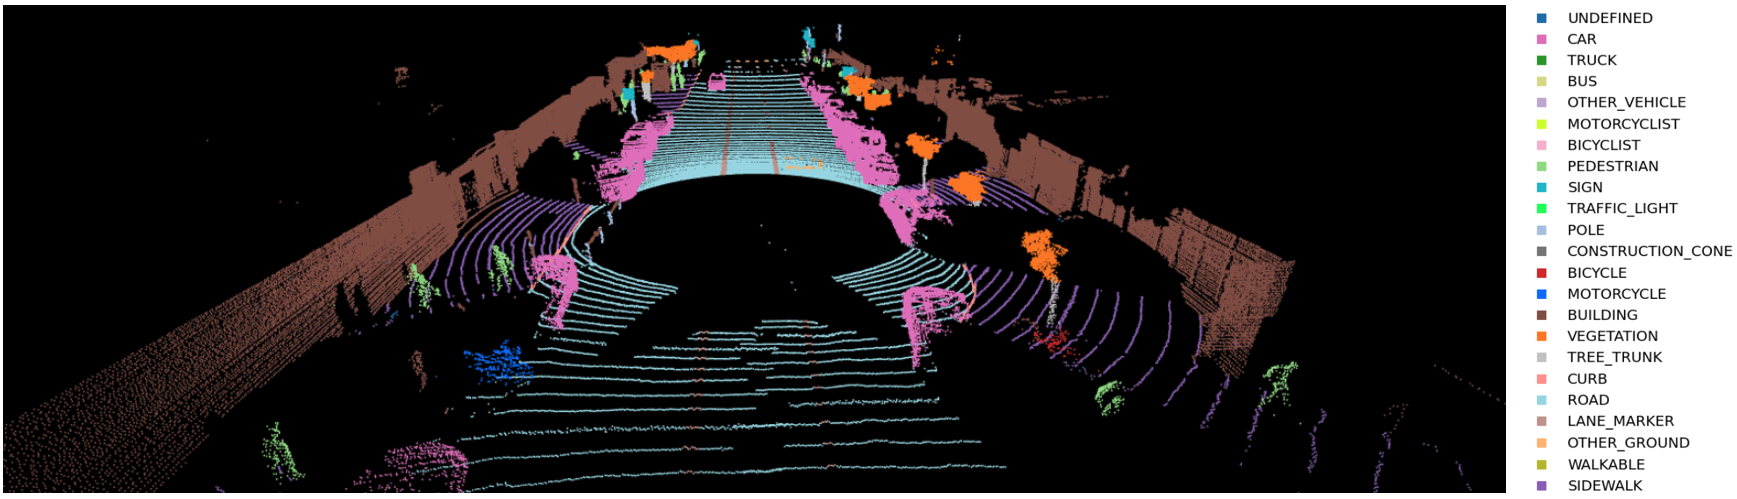

In [ ]:
from IPython.display import Image, display
!wget https://raw.githubusercontent.com/waymo-research/waymo-open-dataset/master/tutorial/3d_semseg_points.png
display(Image('/content/3d_semseg_points.png'))

#### Create a dummy submission file for the validation set

In [ ]:


import zlib

def compress_array(array: np.ndarray, is_int32: bool = False):
  """Compress a numpy array to ZLIP compressed serialized MatrixFloat/Int32.

  Args:
    array: A numpy array.
    is_int32: If true, use MatrixInt32, otherwise use MatrixFloat.

  Returns:
    The compressed bytes.
  """
  if is_int32:
    m = open_dataset.MatrixInt32()
  else:
    m = open_dataset.MatrixFloat()
  m.shape.dims.extend(list(array.shape))
  m.data.extend(array.reshape([-1]).tolist())
  return zlib.compress(m.SerializeToString())

def decompress_array(array_compressed: bytes, is_int32: bool = False):
  """Decompress bytes (of serialized MatrixFloat/Int32) to a numpy array.

  Args:
    array_compressed: bytes.
    is_int32: If true, use MatrixInt32, otherwise use MatrixFloat.

  Returns:
    The decompressed numpy array.
  """
  decompressed = zlib.decompress(array_compressed)
  if is_int32:
    m = open_dataset.MatrixInt32()
    dtype = np.int32
  else:
    m = open_dataset.MatrixFloat()
    dtype = np.float32
  m.ParseFromString(decompressed)
  return np.array(m.data, dtype=dtype).reshape(m.shape.dims)


TOP_LIDAR_ROW_NUM = 64
TOP_LIDAR_COL_NUM = 2650


def get_range_image_point_indexing(range_images, ri_index=0):
  """Get the indices of the valid points (of the TOP lidar) in the range image.

  The order of the points match those from convert_range_image_to_point_cloud
  and convert_range_image_to_point_cloud_labels.

  Args:
    range_images: A dict of {laser_name, [range_image_first_return,
       range_image_second_return]}.
    ri_index: 0 for the first return, 1 for the second return.

  Returns:
    points_indexing_top: (N, 2) col and row indices of the points in the
      TOP lidar.
  """
  points_indexing_top = None
  xgrid, ygrid = np.meshgrid(range(TOP_LIDAR_COL_NUM), range(TOP_LIDAR_ROW_NUM))
  col_row_inds_top = np.stack([xgrid, ygrid], axis=-1)
  range_image = range_images[open_dataset.LaserName.TOP][ri_index]
  range_image_tensor = tf.reshape(
      tf.convert_to_tensor(range_image.data), range_image.shape.dims)
  range_image_mask = range_image_tensor[..., 0] > 0
  points_indexing_top = col_row_inds_top[np.where(range_image_mask)]
  return points_indexing_top


def dummy_semseg_for_one_frame(frame, dummy_class=14):
  """Assign all valid points to a single dummy class.

  Args:
    frame: An Open Dataset Frame proto.
    dummy_class: The class to assign to. Default is 14 (building).

  Returns:
    segmentation_frame: A SegmentationFrame proto.
  """
  (range_images, camera_projections, segmentation_labels,
   range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(
       frame)
  # Get the col, row indices of the valid points.
  points_indexing_top = get_range_image_point_indexing(range_images, ri_index=0)
  points_indexing_top_ri2 = get_range_image_point_indexing(
      range_images, ri_index=1)
  # Assign the dummy class to all valid points (in the range image)
  range_image_pred = np.zeros(
      (TOP_LIDAR_ROW_NUM, TOP_LIDAR_COL_NUM, 2), dtype=np.int32)
  range_image_pred[points_indexing_top[:, 1],
                   points_indexing_top[:, 0], 1] = dummy_class
  range_image_pred_ri2 = np.zeros(
      (TOP_LIDAR_ROW_NUM, TOP_LIDAR_COL_NUM, 2), dtype=np.int32)
  range_image_pred_ri2[points_indexing_top_ri2[:, 1],
                       points_indexing_top_ri2[:, 0], 1] = dummy_class
  # Construct the SegmentationFrame proto.
  segmentation_frame = segmentation_metrics_pb2.SegmentationFrame()
  segmentation_frame.context_name = frame.context.name
  segmentation_frame.frame_timestamp_micros = frame.timestamp_micros
  laser_semseg = open_dataset.Laser()
  laser_semseg.name = open_dataset.LaserName.TOP
  laser_semseg.ri_return1.segmentation_label_compressed = compress_array(
      range_image_pred, is_int32=True)
  laser_semseg.ri_return2.segmentation_label_compressed = compress_array(
      range_image_pred_ri2, is_int32=True)
  segmentation_frame.segmentation_labels.append(laser_semseg)
  return segmentation_frame


# Create the dummy pred file for the validation set run segments.

# Replace this path with the real path to the WOD validation set folder.
folder_name = '/content/waymo-od/.../validation/'

filenames = [os.path.join(folder_name, x) for x in os.listdir(
    folder_name) if 'tfrecord' in x]
assert(len(filenames) == 202)

segmentation_frame_list = segmentation_metrics_pb2.SegmentationFrameList()
for idx, filename in enumerate(filenames):
  if idx % 10 == 0:
    print('Processing %d/%d run segments...' % (idx, len(filenames)))
  dataset = tf.data.TFRecordDataset(filename, compression_type='')
  for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    if frame.lasers[0].ri_return1.segmentation_label_compressed:
      segmentation_frame = dummy_semseg_for_one_frame(frame)
      segmentation_frame_list.frames.append(segmentation_frame)
print('Total number of frames: ', len(segmentation_frame_list.frames))


# Create the submission file, which can be uploaded to the eval server.
submission = segmentation_submission_pb2.SemanticSegmentationSubmission()
submission.account_name = 'joe@gmail.com'
submission.unique_method_name = 'JoeNet'
submission.affiliation = 'Smith Inc.'
submission.authors.append('Joe Smith')
submission.description = "A dummy method by Joe (val set)."
submission.method_link = 'NA'
submission.sensor_type = 1
submission.number_past_frames_exclude_current = 2
submission.number_future_frames_exclude_current = 0
submission.inference_results.CopyFrom(segmentation_frame_list)


output_filename = '/tmp/wod_semseg_val_set_dummy_pred_submission.bin'
f = open(output_filename, 'wb')
f.write(submission.SerializeToString())
f.close()



FileNotFoundError: [Errno 2] No such file or directory: '/content/waymo-od/.../validation/'

#### Create a dummy submission file for the testing set

In [ ]:


# Create the dummy pred file for the testing set run segments.

# Replace the paths with the real paths to the WOD testing set folders.
folder_name1 = '/content/waymo-od/.../testing/'
folder_name2 = '/content/waymo-od/.../testing_location/'
filenames1 = [os.path.join(folder_name1, x) for x in os.listdir(
    folder_name1) if 'tfrecord' in x]
filenames2 = [os.path.join(folder_name2, x) for x in os.listdir(
    folder_name2) if 'tfrecord' in x]
filenames = filenames1 + filenames2
print(len(filenames))
assert(len(filenames) == 150)

# Replace this path with the real path. The file is under:
# /waymo-open-dataset/tutorial/ in the github repo.
# Each line of the file is the ", " of a frame
# with semseg labels.
testing_set_frame_file = '/path/3d_semseg_test_set_frames.txt'
context_name_timestamp_tuples = [x.rstrip().split(',') for x in (
    open(testing_set_frame_file, 'r').readlines())]

segmentation_frame_list = segmentation_metrics_pb2.SegmentationFrameList()
for idx, filename in enumerate(filenames):
  if idx % 10 == 0:
    print('Processing %d/%d run segments...' % (idx, len(filenames)))
  dataset = tf.data.TFRecordDataset(filename, compression_type='')
  for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    context_name = frame.context.name
    timestamp = frame.timestamp_micros
    if (context_name, str(timestamp)) in context_name_timestamp_tuples:
      print(context_name, timestamp)
      segmentation_frame = dummy_semseg_for_one_frame(frame)
      segmentation_frame_list.frames.append(segmentation_frame)
print('Total number of frames: ', len(segmentation_frame_list.frames))


# Create the submission file, which can be uploaded to the eval server.
submission = segmentation_submission_pb2.SemanticSegmentationSubmission()
submission.account_name = 'joe@gmail.com'
submission.unique_method_name = 'JoeNet'
submission.affiliation = 'Smith Inc.'
submission.authors.append('Joe Smith')
submission.description = "A dummy method by Joe (test set)."
submission.method_link = 'NA'
submission.sensor_type = 1
submission.number_past_frames_exclude_current = 2
submission.number_future_frames_exclude_current = 0
submission.inference_results.CopyFrom(segmentation_frame_list)


output_filename = '/tmp/wod_semseg_test_set_dummy_pred_submission.bin'
f = open(output_filename, 'wb')
f.write(submission.SerializeToString())
f.close()



FileNotFoundError: [Errno 2] No such file or directory: '/content/waymo-od/.../testing/'